In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
iris = pd.read_csv("iris.csv")
iris.shape

(150, 5)

In [28]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [11]:
iris.Species.value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [14]:
iris_corr = iris.select_dtypes('number').corr()

<Axes: >

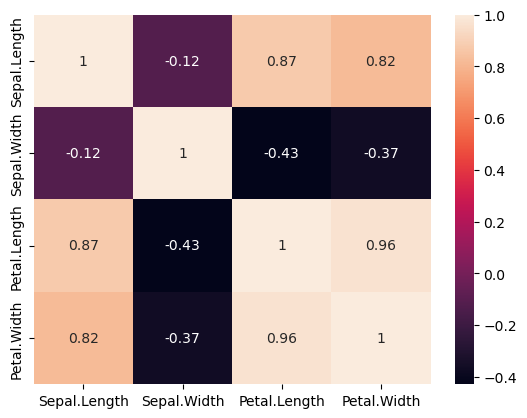

In [15]:
sns.heatmap(iris_corr, annot = True)

In [17]:
# we can see the petal length and petal width has highest correlation, and petal width/sepal width has lowest correlation

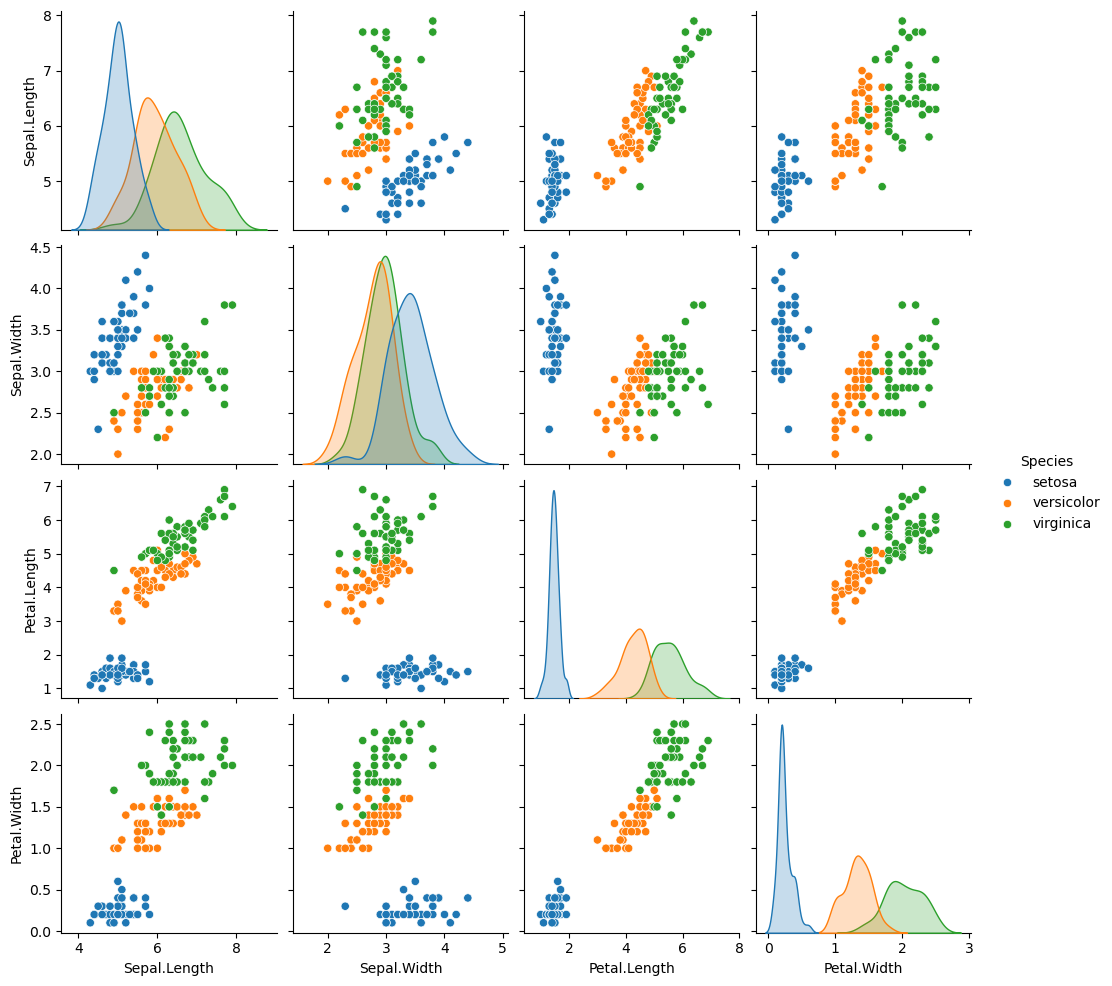

In [19]:
sns.pairplot(iris, hue = "Species")

In [20]:
# setosa seems to be clustered further away from the other two species 

<Axes: xlabel='Species', ylabel='Petal.Width'>

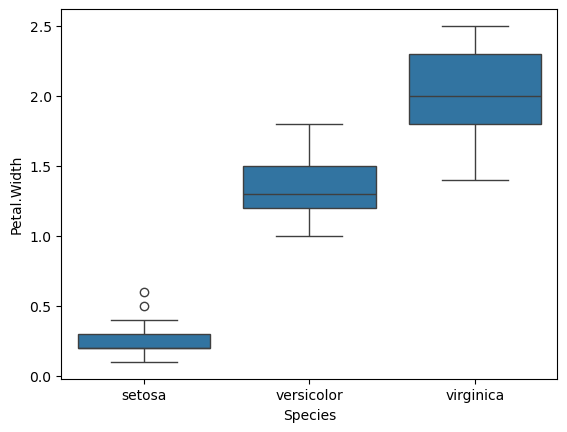

In [25]:
sns.boxplot(data = iris, x = 'Species', y = 'Petal.Width' )

In [37]:
# - Create a summary table showing the mean and standard deviation of each numerical variable per each species.
stat_list = ["mean", "std"]
iris.groupby("Species")[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].agg(stat_list)

Sepal.Length           Sepal.Width           Petal.Length  \
                   mean       std        mean       std         mean   
Species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     Petal.Width            
                 std        mean       std  
Species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

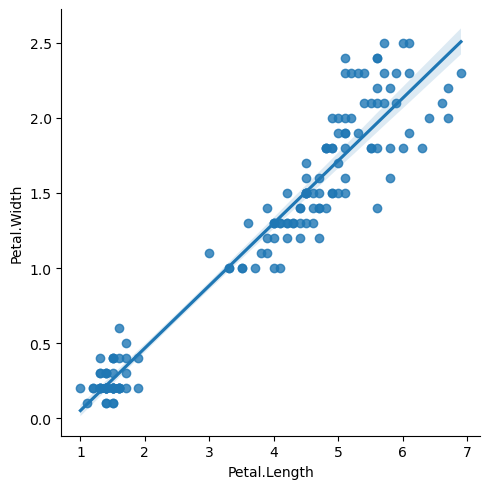

In [38]:
# - Try Linear Regression on the two numerical variables, `Petal.Length` and `Petal.Width`. What kind of conclusions can you derive?
sns.lmplot(data = iris, x = "Petal.Width", y = "Petal.Length")

In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
# Create a least squares model for the 'Petal.Width' and 'Petal.Length' variables from our data set
y = iris["Petal.Length"]
x = iris["Petal.Width"]
X = sm.add_constant(x)

iris_model1 = sm.OLS(y, X)
fit1 = iris_model1.fit()

# Display the summary of our model
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Petal.Length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           4.68e-86
Time:                        16:56:18   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0836      0.073     14.850      0.000       0.939       1.228
Petal.Width     2.2299      0.051     43.387      0.000       2.128       2.332
==============================================================================
Omnibus:                        2.438   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.966
Skew:                           0.211   Prob(JB):                        0.374
Kurtosis:                       3.369   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# - Generate a decision tree with `max_depth = 2` where the target variable is `Species` 
# and the independent variables are all the numerical variables from the `iris` data set. 
# Which variables are the most important in determining `Species`? Do you think our decision tree is a "good" classifier?
from sklearn import tree

X = iris.select_dtypes('number')
y = iris.loc[:,"Species"] #species
model2 = tree.DecisionTreeClassifier(max_depth=2)
model2 = model2.fit(X, y)

# Get the feature names
feature_names = X.columns.tolist()

[Text(0.4, 0.8333333333333334, 'Petal.Width <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'Petal.Width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

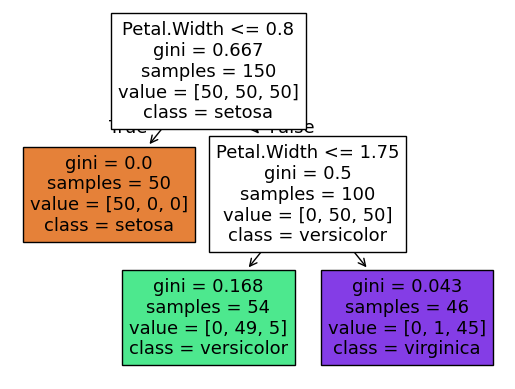

In [41]:
# Sepal.Length	Sepal.Width	 Petal.Length	Petal.Width
tree.plot_tree(model2, feature_names=feature_names, class_names=model2.classes_, filled=True)